Создаем графики и отображаем их

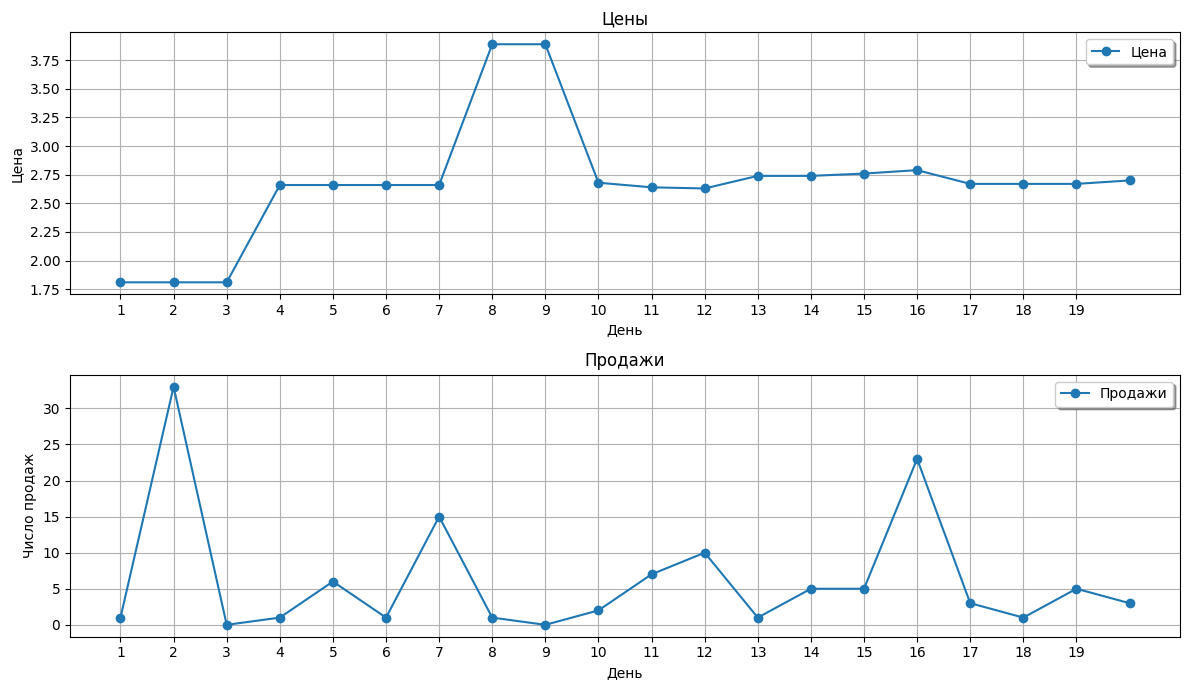

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Example: Line Chart
with open("DataSet.csv", newline='\n') as fp:
    reader = csv.reader(fp, delimiter=';', )
    data = [row for row in reader]
    title = data[0]
    data = data[1:]
dates = [i for i in range(1, 21)]
prices = [float(row[1].replace(',', '.')) for row in data]
sells = [float(row[2].replace(',', '.')) for row in data]


fig, ax = plt.subplots(2, 1, figsize=(12, 7))
price_plot = ax[0]
price_plot.plot(dates, prices, marker='o', label='Цена')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')
price_plot.set_xticks(np.arange(min(dates), max(dates), 1))

price_plot.locator_params('y', nbins=len(set(prices)))
price_plot.legend(fontsize=10, shadow=True)
ax[0] = price_plot
price_plot.grid()


sells_plot = ax[1]
sells_plot.plot(dates, sells, marker='o', label='Продажи')

sells_plot.set_xlabel(title[0])
sells_plot.set_ylabel(title[2])
sells_plot.set_title('Продажи')
sells_plot.set_xticks(np.arange(min(dates), max(dates), 1))

sells_plot.locator_params('y', nbins=len(set(prices)))
sells_plot.legend(fontsize=10, shadow=True)
ax[1] = sells_plot
sells_plot.grid()
fig.tight_layout()

Определим и нанесем на график среднее значение (математическое ожидание (М(Х)), значение медианы (Ме) и моды (Мо). Посчитаем значения среднего геометрического, вычислим гармоническое
значение (при возникновении деления на ноль соответствующая характеристика не рассчитывается).
Определим величины дисперсии (D) и среднеквадратичного отклонения (�)

In [5]:
print(dates)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
